<a href="https://colab.research.google.com/github/ycv005/Weather_forecast/blob/master/new_west_pacific_wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
data = pd.read_csv('wind_west_pacific.csv')
data = data.set_index('YEAR')

In [0]:
data.head(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1979,-1.6,1.2,2.6,2.1,3.4,4.5,2.6,3.1,3.3,-0.8,1.0,-2.5
1980,0.3,1.9,-2.1,0.0,0.5,1.2,2.0,1.4,1.4,1.2,-0.7,0.4
1981,1.1,-1.0,-0.9,4.5,2.5,3.8,4.8,3.6,2.4,2.4,-1.6,-1.6
1982,1.7,0.8,-0.7,0.8,1.1,0.4,-2.5,-2.0,-5.0,0.9,-5.0,0.9
1983,0.1,1.9,1.0,2.4,2.5,2.6,3.8,4.8,4.2,2.6,0.4,1.3
1984,4.8,6.4,5.4,6.8,6.3,3.8,4.2,3.6,4.1,1.5,-0.1,-0.7
1985,-0.8,3.7,-1.0,3.3,3.7,3.0,3.5,4.9,4.0,-0.6,-0.6,-0.6
1986,2.0,0.8,5.0,1.0,0.5,3.3,2.3,2.7,0.8,1.0,-2.7,-5.2
1987,0.7,-2.2,0.2,-0.3,2.3,0.3,2.2,1.8,1.3,-0.3,-0.3,-1.7


In [0]:
data1 = data.transpose()
data1

YEAR,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
JAN,-1.6,0.3,1.1,1.7,0.1,4.8,-0.8,2.0,0.7,0.5,3.7,-1.1,0.8,-2.9,0.3,1.6,0.3,3.0,0.2,1.5,7.3,3.5,6.4,2.1,0.8,1.4,0.9,4.1,1.5,2.8,4.7,0.9,4.4,4.1,1.5,1.2,1.3,0.9,3.4,5.1,-0.6
FEB,1.2,1.9,-1.0,0.8,1.9,6.4,3.7,0.8,-2.2,1.0,3.0,-2.5,1.6,0.6,-3.0,2.7,2.0,3.5,3.2,1.9,3.9,7.3,5.8,-0.1,2.3,2.6,-1.8,3.5,2.9,6.5,7.1,0.7,4.3,6.2,4.7,-0.1,1.1,2.4,3.7,-0.7,-1.7
MAR,2.6,-2.1,-0.9,-0.7,1.0,5.4,-1.0,5.0,0.2,4.7,4.4,1.2,-1.1,1.0,-1.3,3.0,3.1,4.0,-5.2,1.4,8.1,6.2,5.2,1.9,3.4,1.7,2.4,3.3,2.9,6.8,2.9,2.5,6.1,5.2,3.2,0.9,-2.1,2.6,5.9,0.4,1.7
APR,2.1,0.0,4.5,0.8,2.4,6.8,3.3,1.0,-0.3,2.6,3.3,3.2,0.9,0.2,2.5,2.6,0.3,5.2,-0.9,4.6,7.0,7.2,5.2,2.2,2.1,1.0,1.7,4.5,4.4,6.0,4.3,4.0,6.2,3.8,6.2,2.2,1.3,3.1,3.3,2.0,4.3
MAY,3.4,0.5,2.5,1.1,2.5,6.3,3.7,0.5,2.3,4.6,3.6,2.5,1.9,2.5,2.0,2.1,2.2,3.6,-0.1,5.3,6.1,5.9,3.6,1.7,3.1,4.5,3.9,2.6,3.6,5.1,3.8,6.7,4.8,4.4,6.4,4.0,0.4,5.0,5.7,4.0,0.2
JUN,4.5,1.2,3.8,0.4,2.6,3.8,3.0,3.3,0.3,3.8,3.6,2.4,2.8,2.8,2.7,3.2,5.4,5.6,1.7,6.3,4.8,6.2,3.0,3.9,3.3,1.1,5.3,3.9,6.4,6.2,3.2,6.5,5.8,4.6,4.9,4.2,2.3,3.7,4.6,4.1,4.8
JUL,2.6,2.0,4.8,-2.5,3.8,4.2,3.5,2.3,2.2,4.6,5.2,3.6,2.0,2.6,2.0,1.5,5.2,4.6,-1.8,6.9,4.8,4.4,3.6,1.1,3.9,2.9,1.1,1.4,4.9,6.6,2.8,7.6,5.3,5.4,5.0,3.8,2.0,4.1,5.7,4.4,2.4
AUG,3.1,1.4,3.6,-2.0,4.8,3.6,4.9,2.7,1.8,6.4,4.9,3.5,2.2,2.9,3.4,0.9,6.1,5.9,-4.1,5.3,5.8,4.2,3.3,0.8,3.7,1.7,3.3,1.4,4.9,6.8,3.0,7.9,5.4,4.9,4.8,3.8,0.8,3.8,5.3,2.5,2.8
SEP,3.3,1.4,2.4,-5.0,4.2,4.1,4.0,0.8,1.3,6.8,4.9,3.0,0.1,2.5,1.1,1.1,4.5,3.9,0.5,6.6,5.2,4.5,4.0,-3.0,3.4,2.9,3.0,1.9,4.7,5.2,1.5,8.2,6.7,2.5,4.0,3.4,-0.7,5.0,6.1,0.6,1.4
OCT,-0.8,1.2,2.4,0.9,2.6,1.5,-0.6,1.0,-0.3,3.0,2.9,-3.4,1.0,1.6,1.8,0.0,3.8,4.1,-0.8,4.7,6.1,3.2,1.2,0.1,2.1,-0.5,3.5,-0.9,3.7,5.6,-0.3,5.8,4.0,3.3,1.6,2.0,0.6,3.6,3.3,1.3,-0.6


In [0]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data1.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=492, freq='MS')

In [0]:
data_np = data1.transpose().as_matrix()
shape = data_np.shape
data_np

array([[-1.6,  1.2,  2.6,  2.1,  3.4,  4.5,  2.6,  3.1,  3.3, -0.8,  1. ,
        -2.5],
       [ 0.3,  1.9, -2.1,  0. ,  0.5,  1.2,  2. ,  1.4,  1.4,  1.2, -0.7,
         0.4],
       [ 1.1, -1. , -0.9,  4.5,  2.5,  3.8,  4.8,  3.6,  2.4,  2.4, -1.6,
        -1.6],
       [ 1.7,  0.8, -0.7,  0.8,  1.1,  0.4, -2.5, -2. , -5. ,  0.9, -5. ,
         0.9],
       [ 0.1,  1.9,  1. ,  2.4,  2.5,  2.6,  3.8,  4.8,  4.2,  2.6,  0.4,
         1.3],
       [ 4.8,  6.4,  5.4,  6.8,  6.3,  3.8,  4.2,  3.6,  4.1,  1.5, -0.1,
        -0.7],
       [-0.8,  3.7, -1. ,  3.3,  3.7,  3. ,  3.5,  4.9,  4. , -0.6, -0.6,
        -0.6],
       [ 2. ,  0.8,  5. ,  1. ,  0.5,  3.3,  2.3,  2.7,  0.8,  1. , -2.7,
        -5.2],
       [ 0.7, -2.2,  0.2, -0.3,  2.3,  0.3,  2.2,  1.8,  1.3, -0.3, -0.3,
        -1.7],
       [ 0.5,  1. ,  4.7,  2.6,  4.6,  3.8,  4.6,  6.4,  6.8,  3. ,  3.9,
         1.1],
       [ 3.7,  3. ,  4.4,  3.3,  3.6,  3.6,  5.2,  4.9,  4.9,  2.9, -2.3,
        -1.5],
       [-1.1, -2.5,  

In [0]:
data_np = data_np.reshape((shape[0] * shape[1], 1))
data_np.shape

(492, 1)

In [0]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)
df.head()

,Mean
1950-01-01,-1.6
1950-02-01,1.2
1950-03-01,2.6
1950-04-01,2.1
1950-05-01,3.4


Text(0, 0.5, 'Mean across Month')

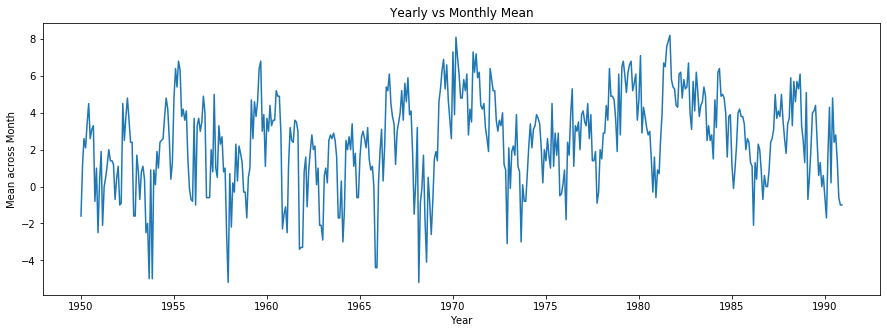

In [0]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [0]:
dataset = df.values
dataset.shape

(492, 1)

In [0]:
train = dataset[0:372,:]
test = dataset[372:,:]

In [0]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (492, 1)
Train shape: (372, 1)
Test shape: (120, 1)


In [0]:
# Converting the data into MinMax Scaler because to avoid any outliers present in our dataset
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(492, 1)

In [0]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#x_train shape
x_train.shape

(312, 60)

In [0]:
#y_train shape
y_train.shape

(312,)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(312, 60, 1)

In [0]:
 # Creating and fitting the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 24s - loss: 0.0377
Epoch 2/10
 - 23s - loss: 0.0302
Epoch 3/10
 - 22s - loss: 0.0252
Epoch 4/10
 - 22s - loss: 0.0225
Epoch 5/10
 - 23s - loss: 0.0213
Epoch 6/10
 - 22s - loss: 0.0209
Epoch 7/10
 - 22s - loss: 0.0213
Epoch 8/10
 - 23s - loss: 0.0202
Epoch 9/10
 - 22s - loss: 0.0203
Epoch 10/10
 - 23s - loss: 0.0197


In [0]:
# Now Let's perform same operations that are done on train set
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

In [0]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

1.496112787607106

Text(0.5, 1.0, 'Forecasting on Actual data')

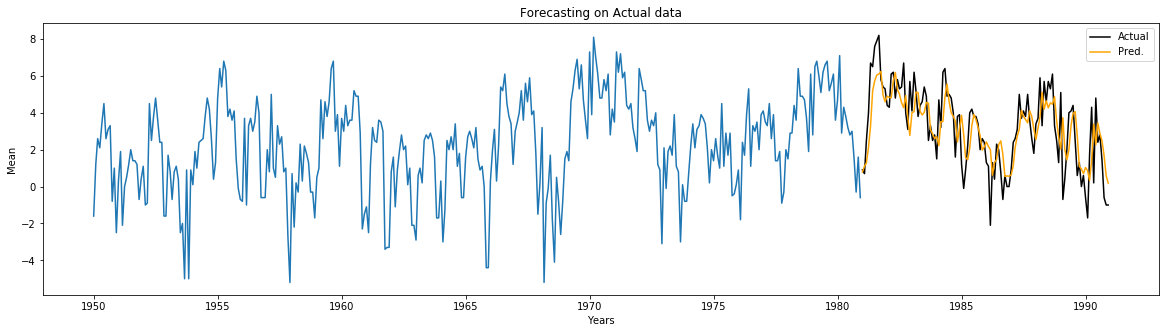

In [0]:
#plotting the train, test and forecast data
train = df[:372]
test = df[372:]
test['Predictions'] = Mean1

plt.figure(figsize=(20,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], label = 'Actual', color = 'black')
plt.plot(test['Predictions'], label = 'Pred.', color = 'orange')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')
